In [ ]:
import numpy as np
import pandas as pd
import itertools
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving news.csv to news.csv


In [ ]:
#Read the data
df=pd.read_csv('news.csv')

#Get shape and head
df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


In [ ]:
df.dtypes

Unnamed: 0     int64
title         object
text          object
label         object
dtype: object

In [ ]:
#DataFlair - Get the labels
labels=df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

In [ ]:
import re
import string
from nltk.corpus import stopwords
from wordcloud import WordCloud,STOPWORDS
from nltk.stem.porter import PorterStemmer

In [ ]:
#Punctuating cleaning
clean_news=df.copy()
def review_cleaning(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
clean_news['text']=clean_news['text'].apply(lambda x:review_cleaning(x))
clean_news.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield a shillman journalism fellow...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary of state john f kerry said monday...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november the lesson...,FAKE
4,875,The Battle of New York: Why This Primary Matters,its primary day in new york and frontrunners h...,REAL


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
#removing stop words
stop = stopwords.words('english')
clean_news['text'] = clean_news['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))
clean_news.head()



,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,daniel greenfield shillman journalism fellow f...,FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,google pinterest digg linkedin reddit stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,us secretary state john f kerry said monday st...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,— kaydee king kaydeeking november lesson tonig...,FAKE
4,875,The Battle of New York: Why This Primary Matters,primary day new york frontrunners hillary clin...,REAL


In [ ]:
#Extracting 'reviews' for processing
news_features=clean_news.copy()
news_features=news_features[['text']].reset_index(drop=True)
news_features.head()

,text
0,daniel greenfield shillman journalism fellow f...
1,google pinterest digg linkedin reddit stumbleu...
2,us secretary state john f kerry said monday st...
3,— kaydee king kaydeeking november lesson tonig...
4,primary day new york frontrunners hillary clin...


In [ ]:
stop_words = set(stopwords.words("english"))
#Performing stemming on the review dataframe
ps = PorterStemmer()

#splitting and adding the stemmed words except stopwords
corpus = []
for i in range(0, len(news_features)):
    news = re.sub('[^a-zA-Z]', ' ', news_features['text'][i])
    news= news.lower()
    news = news.split()
    news = [ps.stem(word) for word in news if not word in stop_words]
    news = ' '.join(news)
    corpus.append(news)

In [ ]:
!pip install wordcloud

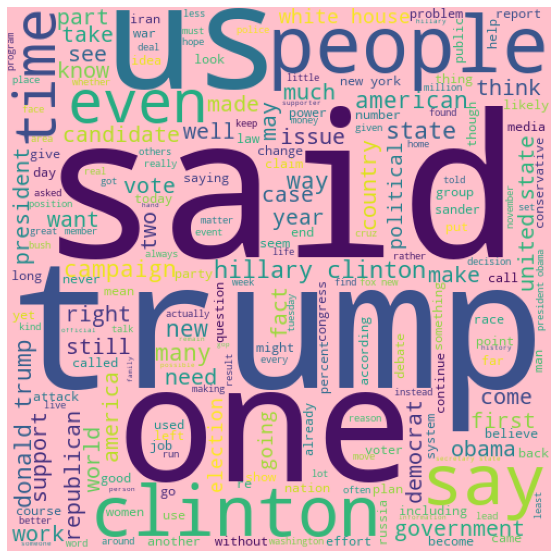

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(' '.join(news_features['text']))
plot_cloud(wordcloud)

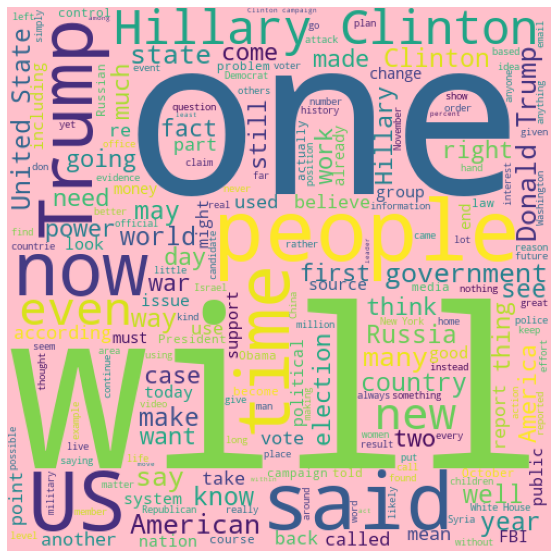

In [ ]:
#word cloud for fake news
fake_news = df[df['label']=="FAKE"]
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(' '.join(fake_news['text']))
plot_cloud(wordcloud)

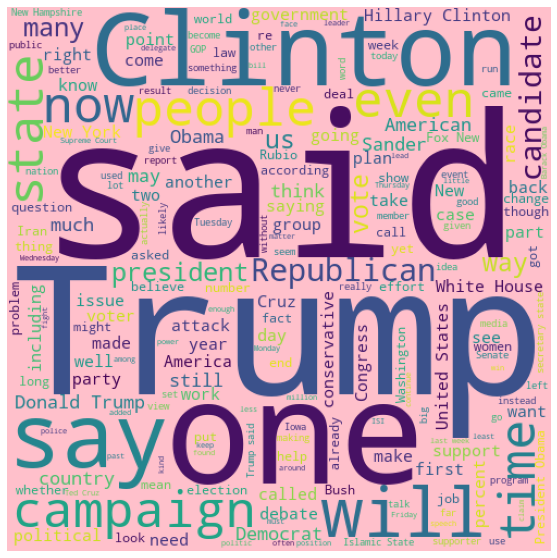

In [ ]:
#word cloud for true news
fake_news = df[df['label']=="REAL"]
from wordcloud import WordCloud
import matplotlib.pyplot as plt 
def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 10))
    plt.imshow(wordcloud) 
    plt.axis("off");
wordcloud = WordCloud(width = 500, height = 500, background_color='pink', random_state=10).generate(' '.join(fake_news['text']))
plot_cloud(wordcloud)

In [ ]:
#print(len(labels=="FAKE"))
#print(len(labels=="TRUE"))
#df['label'].str.len()
print()
print(len(df[df['label'].str.contains("REAL")]))


3171


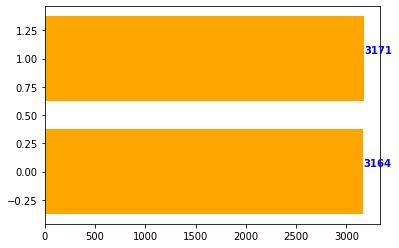

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
#news_features['text']
x = ['FAKE','REAL']
y = [len(df[df['label'].str.contains("FAKE")]),len(df[df['label'].str.contains("REAL")])]
fig, ax = plt.subplots()
width = 0.75
ind = np.arange(len(y))
  
ax.barh(ind, y, width,color = "orange")
  
for i, v in enumerate(y):
    ax.text(v + 2, i + .05, str(v), 
            color = 'blue', fontweight = 'bold')
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

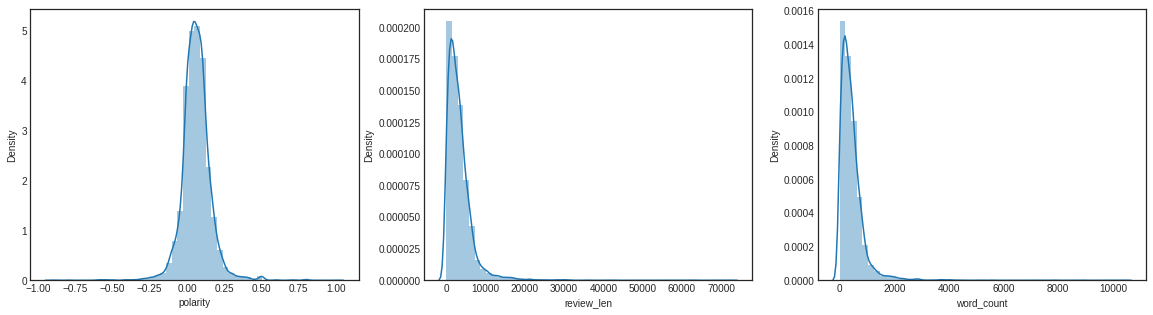

In [ ]:
from textblob import TextBlob
import seaborn as sns
#Extracting the features from the text
news_features['polarity'] = news_features['text'].map(lambda text: TextBlob(text).sentiment.polarity)
news_features['review_len'] = news_features['text'].astype(str).apply(len)
news_features['word_count'] = news_features['text'].apply(lambda x: len(str(x).split()))

#Plotting the distribution of the extracted feature
plt.figure(figsize = (20, 5))
plt.style.use('seaborn-white')
plt.subplot(131)
sns.distplot(news_features['polarity'])
fig = plt.gcf()
plt.subplot(132)
sns.distplot(news_features['review_len'])
fig = plt.gcf()
plt.subplot(133)
sns.distplot(news_features['word_count'])
fig = plt.gcf()

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#DataFlair - Split the dataset
x_train,x_test,y_train,y_test=train_test_split(news_features['text'], labels, test_size=0.2, random_state=7)

In [ ]:
#DataFlair - Initialize a TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer(max_features=5000,ngram_range=(2,2), max_df=0.7)

#DataFlair - Fit and transform train set, transform test set
tfidf_train=tfidf_vectorizer.fit_transform(x_train) 
tfidf_test=tfidf_vectorizer.transform(x_test)


In [ ]:
#DataFlair - Initialize a PassiveAggressiveClassifier
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(tfidf_train,y_train)

#DataFlair - Predict on the test set and calculate accuracy
y_pred=pac.predict(tfidf_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 88.0%


In [ ]:
#DataFlair - Build confusion matrix
confusion_matrix(y_test,y_pred, labels=['FAKE','REAL'])

array([[562,  76],
       [ 76, 553]])

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB().fit(tfidf_train,y_train)
y_pred1 = clf.predict(tfidf_test)
score=accuracy_score(y_test,y_pred1)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 86.82%


#LSTM

In [ ]:
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [ ]:
#Setting up vocabulary size
voc_size=10000

#One hot encoding 
onehot_repr=[one_hot(words,voc_size)for words in corpus] 

In [ ]:
#Setting sentence length
sent_length=5000

#Padding the sentences
embedded_docs=pad_sequences(onehot_repr,padding='pre',maxlen=sent_length)
print(embedded_docs)

[[   0    0    0 ... 9233 6259 2663]
 [   0    0    0 ... 7285 5939 3234]
 [   0    0    0 ...  214 6164 3598]
 ...
 [   0    0    0 ... 5897 8276 9449]
 [   0    0    0 ... 9368  548  144]
 [   0    0    0 ... 1409  621 6530]]


In [ ]:


embedded_docs[1]



array([   0,    0,    0, ..., 7285, 5939, 3234], dtype=int32)

In [ ]:
#Creating the lstm model
embedding_vector_features=40
model=Sequential()
model.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model.add(Dropout(0.3))
model.add(LSTM(100)) #Adding 100 lstm neurons in the layer
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

#Compiling the model
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 5000, 40)          400000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 5000, 40)          0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               56400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 101       
Total params: 456,501
Trainable params: 456,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
cleanup_nums = {"label":     {"REAL": 1, "FAKE": 0}}

In [ ]:
df = df.replace(cleanup_nums)
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",0
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,0
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,1
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",0
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,1


In [ ]:
len(embedded_docs),df['label'].shape

(6335, (6335,))

In [ ]:
# Converting the X and y as array
X_final=np.array(embedded_docs)
y_final=np.array(df['label'])

#Check shape of X and y final
X_final.shape,y_final.shape

((6335, 5000), (6335,))

In [ ]:
# Train test split of the X and y final
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.33, random_state=42)



In [ ]:
# Fitting with 10 epochs and 64 batch size
model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

In [ ]:
#Metrics libraries
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
# Predicting from test data
y_pred=model.predict_classes(X_test)

#Creating confusion matrix
#confusion_matrix(y_test,y_pred)
cm = metrics.confusion_matrix(y_test, y_pred)
#plot_confusion_matrix(cm,classes=['Fake','REAL'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


KeyboardInterrupt: ignored

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
# Creating bidirectional lstm model
embedding_vector_features=40
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(100))) # Bidirectional LSTM layer
model1.add(Dropout(0.3))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 5000, 40)          400000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 200)               112800    
_________________________________________________________________
dropout_3 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 201       
Total params: 513,001
Trainable params: 513,001
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
# Fitting the model
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=5,batch_size=64)

Epoch 1/5
67/67 [==============================] - 922s 14s/step - loss: 0.6907 - accuracy: 0.5500 - val_loss: 0.5871 - val_accuracy: 0.8001
Epoch 2/5
67/67 [==============================] - 979s 15s/step - loss: 0.5568 - accuracy: 0.7308 - val_loss: 0.5842 - val_accuracy: 0.7637
Epoch 3/5
67/67 [==============================] - 987s 15s/step - loss: 0.4546 - accuracy: 0.8629 - val_loss: 0.3211 - val_accuracy: 0.8728
Epoch 4/5
67/67 [==============================] - 989s 15s/step - loss: 0.2550 - accuracy: 0.9160 - val_loss: 0.4181 - val_accuracy: 0.8321
Epoch 5/5
67/67 [==============================] - 982s 15s/step - loss: 0.1399 - accuracy: 0.9528 - val_loss: 0.3322 - val_accuracy: 0.8761


In [ ]:
# Predicting from test dataset
y_pred1=model1.predict_classes(X_test)

#Confusion matrix
cm = metrics.confusion_matrix(y_test, y_pred1)
#plot_confusion_matrix(cm,classes=['Fake','True'])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


In [ ]:
accuracy_score(y_test,y_pred1)

0.8761358201817312

#BERT

In [ ]:
!pip install pytorch_pretrained_bert
!pip install pytorch-nlp
import pandas as pd 
import numpy as np 
import torch.nn as nn
from pytorch_pretrained_bert import BertTokenizer, BertModel
import torch
from torchnlp.datasets import imdb_dataset
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import classification_report

     |████████████████████████████████| 133kB 22.8MB/s 
     |████████████████████████████████| 102kB 9.1MB/s 
     |████████████████████████████████| 7.5MB 30.0MB/s 
     |████████████████████████████████| 81kB 7.2MB/s 
  Created wheel for boto3: filename=boto3-1.17.74-py2.py3-none-any.whl size=128921 sha256=59a4495887cda5f50c10263dffdf46d816b19395efef30bb9cd79389dc67228c
  Stored in directory: /root/.cache/pip/wheels/60/82/8e/41bce50e9ee8d686bd55476ab78c748e6ea4820d612c754569
Successfully built boto3
ERROR: botocore 1.20.74 has requirement urllib3<1.27,>=1.25.4, but you'll have urllib3 1.24.3 which is incompatible.
     |████████████████████████████████| 92kB 7.4MB/s 


In [ ]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("news.csv")
df = df[['text', 'label']]
print(df.head())


                                                text label
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE
2  U.S. Secretary of State John F. Kerry said Mon...  REAL
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE
4  It's primary day in New York and front-runners...  REAL


In [ ]:
from collections import Counter
print(Counter(df['label'].values))

Counter({'REAL': 3171, 'FAKE': 3164})


In [ ]:
df.dropna(inplace = True)

In [ ]:
train_data = df.head(int((6335*70)/100))
test_data = df.tail(int((6335*30)/100))

In [ ]:
train_data = [{'text': text, 'label': type_data } for text in list(train_data['text']) for type_data in list(train_data['label'])]
test_data = [{'text': text, 'label': type_data } for text in list(test_data['text']) for type_data in list(test_data['label'])]

In [ ]:
train_texts, train_labels = list(zip(*map(lambda d: (d['text'], d['label']), train_data)))
test_texts, test_labels = list(zip(*map(lambda d: (d['text'], d['label']), test_data)))

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased', do_lower_case=True)
train_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:511], train_texts))
test_tokens = list(map(lambda t: ['[CLS]'] + tokenizer.tokenize(t)[:511], test_texts))
train_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, train_tokens))
test_tokens_ids = list(map(tokenizer.convert_tokens_to_ids, test_tokens))
train_tokens_ids = pad_sequences(train_tokens_ids, maxlen=512, truncating="post", padding="post", dtype="int")
test_tokens_ids = pad_sequences(test_tokens_ids, maxlen=512, truncating="post", padding="post", dtype="int")

100%|██████████| 231508/231508 [00:00<00:00, 12176041.16B/s]


In [ ]:
train_y = np.array(train_labels) == 'FAKE'
test_y = np.array(test_labels) == 'FAKE'

In [ ]:
print(train_y)
print(test_y)

In [ ]:
class BertBinaryClassifier(nn.Module):
    def __init__(self, dropout=0.1):
        super(BertBinaryClassifier, self).__init__()
self.bert = BertModel.from_pretrained('bert-base-uncased')
self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 1)
        self.sigmoid = nn.Sigmoid()
    
    def forward(self, tokens, masks=None):
        _, pooled_output = self.bert(tokens, attention_mask=masks, output_all_encoded_layers=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        proba = self.sigmoid(linear_output)
        return proba

In [ ]:
train_masks = [[float(i > 0) for i in ii] for ii in train_tokens_ids]
test_masks = [[float(i > 0) for i in ii] for ii in test_tokens_ids]
train_masks_tensor = torch.tensor(train_masks)
test_masks_tensor = torch.tensor(test_masks)

In [ ]:
train_tokens_tensor = torch.tensor(train_tokens_ids)
train_y_tensor = torch.tensor(train_y.reshape(-1, 1)).float()
test_tokens_tensor = torch.tensor(test_tokens_ids)
test_y_tensor = torch.tensor(test_y.reshape(-1, 1)).float()

In [ ]:
train_dataset =  torch.utils.data.TensorDataset(train_tokens_tensor, train_masks_tensor, train_y_tensor)
train_sampler =  torch.utils.data.RandomSampler(train_dataset)
train_dataloader =  torch.utils.data.DataLoader(train_dataset, sampler=train_sampler, batch_size=BATCH_SIZE)
test_dataset =  torch.utils.data.TensorDataset(test_tokens_tensor, test_masks_tensor, test_y_tensor)
test_sampler =  torch.utils.data.SequentialSampler(test_dataset)
test_dataloader =  torch.utils.data.DataLoader(test_dataset, sampler=test_sampler, batch_size=BATCH_SIZE)

In [ ]:
BATCH_SIZE = 1
EPOCHS = 1
bert_clf = BertBinaryClassifier()
optimizer = torch.optim.Adam(bert_clf.parameters(), lr=3e-6)
for epoch_num in range(EPOCHS):
    bert_clf.train()
    train_loss = 0
    for step_num, batch_data in enumerate(train_dataloader):
        token_ids, masks, labels = tuple(t for t in batch_data)
        probas = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        batch_loss = loss_func(probas, labels)
        train_loss += batch_loss.item()
        bert_clf.zero_grad()
        batch_loss.backward()
        optimizer.step()
        print('Epoch: ', epoch_num + 1)
        print("\r" + "{0}/{1} loss: {2} ".format(step_num, len(train_data) / BATCH_SIZE, train_loss / (step_num + 1)))

In [ ]:
bert_clf.eval()
bert_predicted = []
all_logits = []
with torch.no_grad():
    for step_num, batch_data in enumerate(test_dataloader):
token_ids, masks, labels = tuple(t for t in batch_data)
logits = bert_clf(token_ids, masks)
        loss_func = nn.BCELoss()
        loss = loss_func(logits, labels)
        numpy_logits = logits.cpu().detach().numpy()
        
        bert_predicted += list(numpy_logits[:, 0] > 0.5)
        all_logits += list(numpy_logits[:, 0])
        
print(classification_report(test_y, bert_predicted))